<a href="https://colab.research.google.com/github/Batschelet/ML/blob/main/Chorus_26_May_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy openpyxl re2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for re2
  Running setup.py clean for re2
Failed to build re2
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (re2)


In [2]:
!pip install matplotlib seaborn bertopic sentence-transformers deep_translator langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

root_path = "/content/drive/MyDrive/Chorus"
os.chdir(root_path)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /content/drive/MyDrive/Chorus


In [5]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
from langdetect import detect
import re

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        return text

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    if 'Unclear' in resonated or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['followup'] + positive_keywords['demo']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 📥 Load Data
# -------------------------------

# Load Excel
file_path = "chorus_opps_with_transcripts.xlsx"
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

# Prepare base dataframe
comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
comparison_df.columns = ['Company', 'Contact Title', 'Account Owner', 'Call Notes', 'Transcript Raw', 'Campaign Source', 'Chorus Link']

# Translate transcript and title
comparison_df['Transcript'] = comparison_df['Transcript Raw'].apply(translate_if_needed)
comparison_df['Translated Title'] = comparison_df['Contact Title'].apply(translate_to_english)

# Extract event name from Call Notes
def extract_event_name(notes):
    notes = safe_str(notes)
    match = re.match(r'(.*?2025)', notes)
    if match:
        return match.group(1).strip()
    return 'Unknown / No Event'

comparison_df['Event Name'] = comparison_df['Call Notes'].apply(extract_event_name)

# Apply all inference functions on TRANSLATED transcript
comparison_df['Engagement Level'] = comparison_df['Transcript'].apply(infer_engagement)
comparison_df['Interest Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
comparison_df['Decision Power'] = comparison_df['Translated Title'].apply(infer_decision_power)
comparison_df['Pain Points Severity'] = comparison_df['Transcript'].apply(infer_pain)
comparison_df['What Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
comparison_df['What Didn’t Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
comparison_df['getAbstract Fit'] = comparison_df.apply(lambda x: infer_fit(x['What Resonated'], x['Pain Points Severity']), axis=1)
comparison_df['Follow-up Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
comparison_df['Timing Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
comparison_df['Pain Theme (from Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

# Additional features
comparison_df['Missing Transcript'] = comparison_df['Transcript'].apply(lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False)
comparison_df['Unclear Resonance'] = comparison_df.apply(lambda x: True if not x['Missing Transcript'] and any(term in safe_str(x['What Resonated']) for term in vague_terms) else False, axis=1)

# Feasibility scoring
fs_results = comparison_df.apply(lambda x: calculate_feasibility(x['Engagement Level'], x['Interest Timeline'], x['Decision Power'], x['getAbstract Fit']), axis=1)
comparison_df[['Feasibility Score', 'Engagement Score', 'Timeline Score', 'Decision Score', 'Fit Score']] = pd.DataFrame(fs_results.tolist(), index=comparison_df.index)
comparison_df['Feasibility Numeric'] = comparison_df['Feasibility Score'].apply(lambda x: int(x.split('/')[0]))

# Role grouping
comparison_df['Refined Role Group'] = comparison_df['Translated Title'].apply(refined_title_group)

# -------------------------------
# 💾 Export Final DataFrame
# -------------------------------

# Add date to filename
from datetime import datetime
today = datetime.now().strftime('%Y-%m-%d')
output_file = f"final_enhanced_discovery_meeting_analysis_{today}.xlsx"

comparison_df.to_excel(output_file, index=False)
print(comparison_df.head())
print(f"\n✅ Exported to: {os.path.join(root_path, output_file)}")

          Company                              Contact Title    Account Owner  \
0    Limbach Inc.                     Talent Program Manager  Denis Sternberg   
1        Guardian  Manager-Training and Technical Enablement  Denis Sternberg   
2  Augusta Health                                   Pi Coach  Denis Sternberg   
3          Enetic                                        CEO  Denis Sternberg   
4   Star Services                         Program Consultant  Denis Sternberg   

                                          Call Notes Transcript Raw  \
0  Training Conference 2025 - Discovery Meeting D...            NaN   
1  Training Conference 2025 - Discovery Meeting K...            NaN   
2  Training Conference 2025 - Discovery Meeting B...            NaN   
3  Training Conference 2025 - Discovery Meeting K...            NaN   
4  Training Conference 2025 - Discovery Meeting G...            NaN   

  Campaign Source                                        Chorus Link  \
0             

In [9]:
#!pip install bertopic sentence-transformers umap-learn hdbscan openpyxl pandas

In [16]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
from langdetect import detect
import re

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    """Safely convert text to lowercase string"""
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    """Translate text to English if not already in English"""
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        return text  # Fallback to original text

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', 'don’t know', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    if 'Unclear' in resonated or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in ['follow-up', 'demo', 'next steps', 'send']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

# -------------------------------
# 🧭 Role Classification
# -------------------------------

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 📊 Main Execution
# -------------------------------

# Load data
file_path = 'chorus_opps_with_transcripts.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

# Prepare base dataframe
comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
comparison_df.columns = ['Company', 'Contact Title', 'Account Owner', 'Call Notes', 'Transcript Raw', 'Campaign Source', 'Chorus Link']

# Translate transcript and title
comparison_df['Transcript'] = comparison_df['Transcript Raw'].apply(translate_if_needed)
comparison_df['Translated Title'] = comparison_df['Contact Title'].apply(translate_to_english)

# Extract event name from Call Notes (everything up to '2025')
def extract_event_name(notes):
    notes = safe_str(notes)
    match = re.match(r'(.*?2025)', notes)
    if match:
        return match.group(1).strip()
    return 'Unknown / No Event'

comparison_df['Event Name'] = comparison_df['Call Notes'].apply(extract_event_name)

# Apply inference functions on TRANSLATED transcript
comparison_df['Engagement Level'] = comparison_df['Transcript'].apply(infer_engagement)
comparison_df['Interest Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
comparison_df['Decision Power'] = comparison_df['Translated Title'].apply(infer_decision_power)
comparison_df['Pain Points Severity'] = comparison_df['Transcript'].apply(infer_pain)
comparison_df['What Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
comparison_df['What Didn’t Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
comparison_df['getAbstract Fit'] = comparison_df.apply(lambda x: infer_fit(x['What Resonated'], x['Pain Points Severity']), axis=1)
comparison_df['Follow-up Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
comparison_df['Timing Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
comparison_df['Pain Theme (from Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

# Additional features
comparison_df['Missing Transcript'] = comparison_df['Transcript'].apply(
    lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False
)

comparison_df['Unclear Resonance'] = comparison_df.apply(
    lambda x: (
        True
        if (not x['Missing Transcript'] and any(term in safe_str(x['What Resonated']) for term in vague_terms))
        else False
    ),
    axis=1
)

# Feasibility scoring
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
from langdetect import detect
import re

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    """Safely convert text to lowercase string"""
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    """Translate text to English if not already in English"""
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        return text  # Fallback to original text

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', 'don’t know', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    if 'Unclear' in resonated or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in ['follow-up', 'demo', 'next steps', 'send']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

# -------------------------------
# 🧭 Role Classification
# -------------------------------

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 📊 Main Execution
# -------------------------------

# Load data
file_path = 'chorus_opps_with_transcripts.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

# Prepare base dataframe
comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
comparison_df.columns = ['Company', 'Contact Title', 'Account Owner', 'Call Notes', 'Transcript Raw', 'Campaign Source', 'Chorus Link']

# Translate transcript and title
comparison_df['Transcript'] = comparison_df['Transcript Raw'].apply(translate_if_needed)
comparison_df['Translated Title'] = comparison_df['Contact Title'].apply(translate_to_english)

# Extract event name from Call Notes (everything up to '2025')
def extract_event_name(notes):
    notes = safe_str(notes)
    match = re.match(r'(.*?2025)', notes)
    if match:
        return match.group(1).strip()
    return 'Unknown / No Event'

comparison_df['Event Name'] = comparison_df['Call Notes'].apply(extract_event_name)

# Apply inference functions on TRANSLATED transcript
comparison_df['Engagement Level'] = comparison_df['Transcript'].apply(infer_engagement)
comparison_df['Interest Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
comparison_df['Decision Power'] = comparison_df['Translated Title'].apply(infer_decision_power)
comparison_df['Pain Points Severity'] = comparison_df['Transcript'].apply(infer_pain)
comparison_df['What Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
comparison_df['What Didn’t Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
comparison_df['getAbstract Fit'] = comparison_df.apply(lambda x: infer_fit(x['What Resonated'], x['Pain Points Severity']), axis=1)
comparison_df['Follow-up Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
comparison_df['Timing Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
comparison_df['Pain Theme (from Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

# Additional features
comparison_df['Missing Transcript'] = comparison_df['Transcript'].apply(
    lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False
)

comparison_df['Unclear Resonance'] = comparison_df.apply(
    lambda x: (
        True
        if (not x['Missing Transcript'] and any(term in safe_str(x['What Resonated']) for term in vague_terms))
        else False
    ),
    axis=1
)

# Feasibility scoring
fs_results = comparison_df.apply(lambda x: calculate_feasibility(x['Engagement Level'], x['Interest Timeline'], x['Decision Power'], x['getAbstract Fit']), axis=1)
comparison_df[['Feasibility Score', 'Engagement Score', 'Timeline Score', 'Decision Score', 'Fit Score']] = pd.DataFrame(fs_results.tolist(), index=comparison_df.index)
comparison_df['Feasibility Numeric'] = comparison_df['Feasibility Score'].apply(lambda x: int(x.split('/')[0]))

# Role grouping
comparison_df['Refined Role Group'] = comparison_df['Translated Title'].apply(refined_title_group)

# Export final DataFrame
from datetime import datetime
today = datetime.now().strftime('%Y-%m-%d')
output_file = f"final_enhanced_discovery_meeting_analysis_{today}.xlsx"

comparison_df.to_excel(output_file, index=False)

# Show preview
print(comparison_df.head())
print(f"\n✅ Exported to: {output_file}")
comparison_df['Refined Role Group'] = comparison_df['Translated Title'].apply(refined_title_group)

# Export final DataFrame
from datetime import datetime
today = datetime.now().strftime('%Y-%m-%d')
output_file = f"final_enhanced_discovery_meeting_analysis_{today}.xlsx"

comparison_df.to_excel(output_file, index=False)

# Show preview
print(comparison_df.head())
print(f"\n✅ Exported to: {output_file}")

          Company                              Contact Title    Account Owner  \
0    Limbach Inc.                     Talent Program Manager  Denis Sternberg   
1        Guardian  Manager-Training and Technical Enablement  Denis Sternberg   
2  Augusta Health                                   Pi Coach  Denis Sternberg   
3          Enetic                                        CEO  Denis Sternberg   
4   Star Services                         Program Consultant  Denis Sternberg   

                                          Call Notes Transcript Raw  \
0  Training Conference 2025 - Discovery Meeting D...            NaN   
1  Training Conference 2025 - Discovery Meeting K...            NaN   
2  Training Conference 2025 - Discovery Meeting B...            NaN   
3  Training Conference 2025 - Discovery Meeting K...            NaN   
4  Training Conference 2025 - Discovery Meeting G...            NaN   

  Campaign Source                                        Chorus Link  \
0             

In [22]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
from langdetect import detect
import re
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import os # Import os for path joining and checking current directory

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    """Safely convert text to lowercase string"""
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    """Translate text to English if not already in English"""
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        # Handle potential None or non-string types after safe_str
        if not isinstance(text, str):
             return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        # print(f"Translation error for text: '{text[:50]}...' - {e}") # Optional: add logging for translation errors
        return text  # Fallback to original text

def translate_to_english(text):
    """Translate text to English (used for titles)"""
    try:
        # Ensure text is a string before translating
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', 'don’t know', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    # Ensure resonated is a string before checking 'Unclear'
    resonated_str = safe_str(resonated)
    if 'unclear' in resonated_str.lower() or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['followup'] + positive_keywords['demo']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

# -------------------------------
# 🧭 Role Classification
# -------------------------------

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'


# -------------------------------
# 📊 Main Execution
# -------------------------------

# Set working directory
root_path = "/content/drive/MyDrive/Chorus"
os.chdir(root_path)
print(f"Current working directory: {os.getcwd()}")

# Load data
file_path = 'chorus_opps_with_transcripts.xlsx'
# Add error handling for file loading
try:
    df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
except FileNotFoundError:
    print(f"Error: File not found at {os.path.join(root_path, file_path)}")
    # Exit or handle the error appropriately
    # Consider using a more graceful exit in a notebook like returning
    raise # Re-raise the exception after printing

except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise # Re-raise the exception after printing


# Prepare base dataframe
comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
comparison_df.columns = ['Company', 'Contact Title', 'Account Owner', 'Call Notes', 'Transcript Raw', 'Campaign Source', 'Chorus Link']

# Translate transcript and title
comparison_df['Transcript'] = comparison_df['Transcript Raw'].apply(translate_if_needed)
comparison_df['Translated Title'] = comparison_df['Contact Title'].apply(translate_to_english)

# Extract event name from Call Notes (everything up to '2025')
def extract_event_name(notes):
    notes = safe_str(notes)
    match = re.match(r'(.*?2025)', notes)
    if match:
        return match.group(1).strip()
    return 'Unknown / No Event'

comparison_df['Event Name'] = comparison_df['Call Notes'].apply(extract_event_name)

# Apply inference functions on TRANSLATED transcript
comparison_df['Engagement Level'] = comparison_df['Transcript'].apply(infer_engagement)
comparison_df['Interest Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
comparison_df['Decision Power'] = comparison_df['Translated Title'].apply(infer_decision_power)
comparison_df['Pain Points Severity'] = comparison_df['Transcript'].apply(infer_pain)
comparison_df['What Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
comparison_df['What Didn’t Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
comparison_df['getAbstract Fit'] = comparison_df.apply(lambda x: infer_fit(x['What Resonated'], x['Pain Points Severity']), axis=1)
comparison_df['Follow-up Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
comparison_df['Timing Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
comparison_df['Pain Theme (from Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

# Additional features
comparison_df['Missing Transcript'] = comparison_df['Transcript'].apply(
    lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False
)

comparison_df['Unclear Resonance'] = comparison_df.apply(
    lambda x: (
        True
        if (not x['Missing Transcript'] and any(term in safe_str(x['What Resonated']) for term in vague_terms))
        else False
    ),
    axis=1
)

# Feasibility scoring
fs_results = comparison_df.apply(lambda x: calculate_feasibility(x['Engagement Level'], x['Interest Timeline'], x['Decision Power'], x['getAbstract Fit']), axis=1)
comparison_df[['Feasibility Score', 'Engagement Score', 'Timeline Score', 'Decision Score', 'Fit Score']] = pd.DataFrame(fs_results.tolist(), index=comparison_df.index)
comparison_df['Feasibility Numeric'] = comparison_df['Feasibility Score'].apply(lambda x: int(x.split('/')[0]))

# Role grouping
comparison_df['Refined Role Group'] = comparison_df['Translated Title'].apply(refined_title_group)

# -------------------------------
# 🤖 BERTopic: Discover Hidden Themes in Conversations
# -------------------------------

# Filter valid transcripts
# Ensure 'Transcript' column is of string type for BERTopic
comparison_df['Transcript'] = comparison_df['Transcript'].astype(str)

# Filter transcripts that are not considered "missing" and have sufficient length
valid_transcripts_df = comparison_df[
    (comparison_df['Missing Transcript'] == False) &
    (comparison_df['Transcript'].apply(lambda x: len(x.strip()) > 50))
]
valid_transcripts = valid_transcripts_df['Transcript'].tolist()
valid_indices = valid_transcripts_df.index


# Check if there are enough documents for BERTopic
if len(valid_transcripts) < 2:
    print("\nℹ️ Not enough valid transcripts (less than 2) for BERTopic modeling.")
    # Add placeholder columns if BERTopic cannot run
    comparison_df['AI Topic'] = -1
    comparison_df['AI Topic Label'] = 'Not enough data for Topic Modeling'
else:
    # Initialize BERTopic model
    # Relax min_df to 1 (default) to allow terms appearing in at least one document
    vectorizer_model = CountVectorizer(stop_words="english", min_df=1) # Changed min_df to 1
    # Consider adding a sentence transformer model for better embeddings if needed
    # from sentence_transformers import SentenceTransformer
    # sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
    # topic_model = BERTopic(embedding_model=sentence_model, vectorizer_model=vectorizer_model, verbose=True)

    topic_model = BERTopic(vectorizer_model=vectorizer_model, verbose=True)

    # Fit model on valid transcripts
    topics, probs = topic_model.fit_transform(valid_transcripts)

    # Map topics back to original DataFrame
    # Create a Series to easily map back to the original DataFrame index
    topic_series = pd.Series(topics, index=valid_indices)

    # Initialize the 'AI Topic' column with -1 for all rows
    comparison_df['AI Topic'] = -1
    # Update 'AI Topic' only for rows that had valid transcripts
    comparison_df.loc[valid_indices, 'AI Topic'] = topic_series

    # Create topic labels map, handle potential empty topics gracefully
    # Ensure topic_model.get_topic_info() is used to get topic information
    topic_info = topic_model.get_topic_info()
    topic_map = {row['Topic']: row['Name'] for index, row in topic_info.iterrows()}
    # Add the -1 topic label
    topic_map[-1] = 'No Topic Found / Transcript too short'

    comparison_df['AI Topic Label'] = comparison_df['AI Topic'].map(topic_map).fillna('Unknown Topic ID') # Add fillna for safety


    # Show top topics
    print("\n🔍 Top Topics Discovered:")
    print(topic_model.get_topic_info().head(10))

    # Optional: Visualize topics (ensure you have the necessary libraries installed)
    try:
        # Check if there are valid topics to visualize (excluding -1)
        if len(topic_info[topic_info['Topic'] != -1]) > 0:
            topic_model.visualize_barchart(top_n_topics=min(10, len(topic_info[topic_info['Topic'] != -1]))).show()
            topic_model.visualize_topics().write_html("topic_visualization.html")
            print("📊 Topic visualization saved to topic_visualization.html")
        else:
            print("\nℹ️ No topics found to visualize (excluding -1).")
    except ImportError:
        print("\nInstall plotly and other visualization libraries for topic visualization: !pip install plotly")
    except Exception as e:
         print(f"\nError during topic visualization: {e}")


# -------------------------------
# 💾 Export Final DataFrame
# -------------------------------

# Add date to filename
today = datetime.now().strftime('%Y-%m-%d')
output_file = f"final_enhanced_discovery_meeting_analysis_{today}.xlsx"

# Add error handling for export
try:
    comparison_df.to_excel(output_file, index=False)
    print(comparison_df.head())
    # Use os.path.join for robustness
    print(f"\n✅ Exported to: {os.path.join(root_path, output_file)}")
except Exception as e:
    print(f"Error exporting Excel file: {e}")

Current working directory: /content/drive/MyDrive/Chorus


2025-05-27 09:21:40,194 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-05-27 09:21:47,011 - BERTopic - Embedding - Completed ✓
2025-05-27 09:21:47,012 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-27 09:21:47,062 - BERTopic - Dimensionality - Completed ✓
2025-05-27 09:21:47,063 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-27 09:21:47,068 - BERTopic - Cluster - Completed ✓
2025-05-27 09:21:47,071 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-27 09:21:47,208 - BERTopic - Representation - Completed ✓



🔍 Top Topics Discovered:
   Topic  Count                    Name  \
0     -1     47  -1_yeah_like_just_okay   

                                      Representation  \
0  [yeah, like, just, okay, jacqueline, cisneros,...   

                                 Representative_Docs  
0  [jacqueline cisneros - 0:00 - with wedding ann...  

ℹ️ No topics found to visualize (excluding -1).
          Company                              Contact Title    Account Owner  \
0    Limbach Inc.                     Talent Program Manager  Denis Sternberg   
1        Guardian  Manager-Training and Technical Enablement  Denis Sternberg   
2  Augusta Health                                   Pi Coach  Denis Sternberg   
3          Enetic                                        CEO  Denis Sternberg   
4   Star Services                         Program Consultant  Denis Sternberg   

                                          Call Notes Transcript Raw  \
0  Training Conference 2025 - Discovery Meeting D...     

In [6]:
pip install streamlit pandas numpy matplotlib seaborn openpyxl bertopic

In [15]:
!streamlit run dashboard.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.145.169.226:8502

  Stopping...
  Stopping...
^C
^C


In [27]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime # Import datetime for export
import os # Import os for listing files
import re # Import re for file matching

# -------------------------------
# 📁 Load Data
# -------------------------------

@st.cache_data
def load_data():
    # Use the current working directory from the previous notebook cell
    # This assumes the streamlit script is run from the same directory
    root_path = "/content/drive/MyDrive/Chorus"
    # Ensure the search is done in the correct directory
    files = [f for f in os.listdir(root_path) if re.match(r"final_enhanced_discovery_meeting_analysis_\d{4}-\d{2}-\d{2}\.xlsx", f)]

    if not files:
        st.error(f"No data file found matching 'final_enhanced_discovery_meeting_analysis_YYYY-MM-DD.xlsx' in {root_path}.")
        return pd.DataFrame()

    # Assuming the latest file is the one to load (or adjust logic if needed)
    files.sort(reverse=True) # Sort to get the latest file first
    latest_file_path = os.path.join(root_path, files[0])

    try:
        df = pd.read_excel(latest_file_path, sheet_name=0, engine='openpyxl')
        return df
    except FileNotFoundError:
        st.error(f"Error: File not found at {latest_file_path}")
        return pd.DataFrame()
    except Exception as e:
        st.error(f"Error loading Excel file {latest_file_path}: {e}")
        return pd.DataFrame()


df = load_data()

if df.empty:
    st.stop() # Stop execution if no data is loaded

# Ensure correct column names by replacing ALL spaces with underscores
# This handles columns like 'Pain Theme (from Transcript)' correctly
df.columns = df.columns.str.replace(' ', '_', regex=True)

st.title("🎯 Sales Discovery Call Dashboard")

# -------------------------------
# 🔍 Sidebar Filters
# -------------------------------

st.sidebar.header("🔍 Filters")

# Use the underscore-replaced column names
owners = st.sidebar.multiselect("Select Account Owner(s)", options=df["Account_Owner"].unique())
role_groups = st.sidebar.multiselect("Select Role Group(s)", options=df["Refined_Role_Group"].unique())
# Assuming Feasibility_Score might be 'High/12', 'Medium/12' etc.
# Let's get unique values directly or create a mapping if needed
feasibility_score_options = sorted(df["Feasibility_Score"].unique())
feasibility_bands = st.sidebar.multiselect("Select Feasibility Score", options=feasibility_score_options)

event_names = st.sidebar.multiselect("Select Event Name", options=df["Event_Name"].unique())

# Text search
search_term = st.sidebar.text_input("Search in Transcript or Company")
if search_term:
    # Ensure columns exist and handle potential NaN values gracefully
    df = df[
        df["Transcript"].astype(str).str.contains(search_term, case=False, na=False) |
        df["Company"].astype(str).str.contains(search_term, case=False, na=False)
    ]

# Apply filters
if owners:
    df = df[df["Account_Owner"].isin(owners)]
if role_groups:
    df = df[df["Refined_Role_Group"].isin(role_groups)]
if feasibility_bands:
    df = df[df["Feasibility_Score"].isin(feasibility_bands)]
if event_names:
    df = df[df["Event_Name"].isin(event_names)]

# -------------------------------
# 📊 Summary Stats
# -------------------------------

st.subheader("📊 Summary Statistics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Meetings", len(df))
# Ensure Feasibility_Numeric is treated as numeric for comparison
df['Feasibility_Numeric'] = pd.to_numeric(df['Feasibility_Numeric'], errors='coerce')
col2.metric("High Feasibility Opportunities", len(df[df["Feasibility_Numeric"] >= 8]))
# Use the underscore-replaced column name
col3.metric("Top Resonated Theme", df["What_Resonated"].mode()[0] if not df["What_Resonated"].isnull().all() else "N/A")

# -------------------------------
# 📈 Key Charts
# -------------------------------

st.subheader("📈 Engagement & Feasibility Overview")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Use the underscore-replaced column name
sns.countplot(data=df, y="Engagement_Level", order=["High", "Medium", "Low"], ax=ax[0])
ax[0].set_title("Engagement Levels")

# Use the underscore-replaced column name
sns.histplot(data=df, x="Feasibility_Numeric", bins=12, ax=ax[1])
ax[1].set_title("Feasibility Score Distribution")
st.pyplot(fig)

# -------------------------------
# 🧭 Role vs Resonance
# -------------------------------

st.subheader("🧱 Resonance by Role Group")

# Use the underscore-replaced column names
resonated_by_role = (
    df.set_index("Refined_Role_Group")["What_Resonated"]
    .str.split(", ")
    .explode()
    .reset_index()
    .groupby(["Refined_Role_Group", "What_Resonated"]).size()
    .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(resonated_by_role, annot=True, fmt='g', cmap="Blues", linewidths=.5)
plt.title("Resonance by Role Group")
st.pyplot(fig)

# -------------------------------
# 🩺 Pain Points
# -------------------------------

st.subheader("🩺 Pain Points Overview")

# Use the underscore-replaced column name
# Ensure the column exists before trying to split and explode
if "Pain_Theme_(from_Transcript)" in df.columns:
    pain_counts = df["Pain_Theme_(from_Transcript)"].str.split(", ").explode().value_counts().head(10)
    st.bar_chart(pain_counts)
else:
    st.write("Pain theme data not available.") # Or handle as needed


# -------------------------------
# 📋 Raw Data Table
# -------------------------------

st.subheader("📋 Filtered Meeting List")
# Use the underscore-replaced column names
st.dataframe(df[['Company', 'Contact_Title', 'Account_Owner', 'Event_Name', 'Feasibility_Score', 'Engagement_Level', 'What_Resonated']])

# -------------------------------
# 💾 Export Button
# -------------------------------

if st.button("Export Filtered Data"):
    today = datetime.now().strftime("%Y-%m-%d")
    # Use os.path.join to create the full path for saving
    output_path = os.path.join(root_path, f"filtered_opportunities_{today}.xlsx")
    try:
        df.to_excel(output_path, index=False)
        st.success(f"✅ Exported filtered data to `{output_path}`")
    except Exception as e:
        st.error(f"Error exporting data: {e}")


# -------------------------------
# 🧠 Optional: Topic Analysis
# -------------------------------

# Use the underscore-replaced column name
if "AI_Topic_Label" in df.columns:
    st.subheader("🧠 Top Topics from Conversations")
    topic_counts = df["AI_Topic_Label"].value_counts()
    st.bar_chart(topic_counts.head(10))

# -------------------------------
# 📌 Optional: Add More Tabs Later
# -------------------------------

tabs = st.tabs(["🔍 By Role", "📅 By Event", "📊 By Feasibility"])

with tabs[0]:
    st.write("Role-based filtering already applied above.")

with tabs[1]:
    st.bar_chart(df["Event_Name"].value_counts())

with tabs[2]:
    st.bar_chart(df.groupby("Feasibility_Score").size())



2025-05-27 09:29:54.968 No runtime found, using MemoryCacheStorageManager
2025-05-27 09:29:54.993 No runtime found, using MemoryCacheStorageManager
2025-05-27 09:29:55.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 09:29:55.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

In [30]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import os # Import os to build the file path
import streamlit as st # Import streamlit for visualizations (if running this cell directly or as part of a streamlit script)
import plotly.graph_objects as go # Import plotly for visualizations
from IPython.display import display # Import display if running in notebook

# -------------------------------
# 📁 Load Your Enhanced DataFrame
# -------------------------------

# Get today's date to construct the filename
from datetime import datetime
today = datetime.now().strftime('%Y-%m-%d')

# Construct the full file path using the working directory set previously
# Assuming the working directory is still the root_path where the file was saved
root_path = "/content/drive/MyDrive/Chorus" # Ensure this matches the path used earlier
file_name = f"final_enhanced_discovery_meeting_analysis_{today}.xlsx"
file_path = os.path.join(root_path, file_name)


# Make sure this file exists before trying to read
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    # Handle this error - maybe stop execution or try a different file
    raise FileNotFoundError(f"The file '{file_path}' was not found.")


# Load the data using the correct file path
try:
    df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
    print(f"✅ Successfully loaded data from: {file_path}")
except Exception as e:
    print(f"Error loading Excel file '{file_path}': {e}")
    raise # Re-raise the exception after printing


# Use translated transcript if available
# Ensure column names match the loaded DataFrame (handling spaces if necessary)
# Based on the previous cells, column names should not have spaces at this point,
# but it's good practice to be mindful of potential variations.
transcripts = df["Transcript"].dropna().astype(str).str.strip()
valid_transcripts = transcripts[transcripts.str.len() > 50]  # Skip very short ones

# -------------------------------
# 🤖 Initialize BERTopic Model
# -------------------------------

# Initialize BERTopic model
# Adjust min_df to 1 to ensure features are created even with a smaller dataset
vectorizer_model = CountVectorizer(stop_words="english", min_df=1)
topic_model = BERTopic(vectorizer_model=vectorizer_model, verbose=True)

# Fit model
# Check if there are valid transcripts to fit the model
if len(valid_transcripts) < 2:
    print("\nℹ️ Not enough valid transcripts (less than 2) for BERTopic modeling.")
    # Add placeholder columns if BERTopic cannot run
    df["AI Topic"] = -1
    df["AI Topic Label"] = 'Not enough data for Topic Modeling'
else:
    topics, probs = topic_model.fit_transform(valid_transcripts.tolist())

    # -------------------------------
    # 🧾 Map Topics Back to DataFrame
    # -------------------------------

    # Create a Series to easily map topics back to the original DataFrame index
    # Make sure the index of the topic series matches the index of valid_transcripts
    topic_series = pd.Series(topics, index=valid_transcripts.index)

    # Initialize the 'AI Topic' column with -1 for all rows
    df["AI Topic"] = -1
    # Update 'AI Topic' only for rows that had valid transcripts
    df.loc[valid_transcripts.index, "AI Topic"] = topic_series

    # Create human-readable labels from top keywords
    # Ensure topic_model.get_topic_info() is used to get topic information
    topic_info = topic_model.get_topic_info()
    # Create the mapping, handle potential missing topics or -1
    topic_map = {row['Topic']: row['Name'] for index, row in topic_info.iterrows()}
    # Add the -1 topic label
    topic_map[-1] = 'No Topic Found / Transcript too short'

    df["AI Topic Label"] = df["AI Topic"].map(topic_map).fillna('Unknown Topic ID') # Add fillna for safety

    # -------------------------------
    # 🧠 Show Top Topics Discovered
    # -------------------------------

    print("\n🔍 Top Topics Discovered:")
    # Only show topics that exist (excluding -1 if it's just placeholders)
    display_topic_info = topic_info[topic_info['Topic'] != -1]
    if not display_topic_info.empty:
        print(display_topic_info.head(10))
    else:
        print("No significant topics found (all documents assigned to -1).")


    # -------------------------------
    # 📈 Interactive Visualizations
    # -------------------------------

    # Ensure you have plotly installed: !pip install plotly
    try:
        # Check if running in a Streamlit environment
        if 'streamlit' in globals() and st.get_script_run_ctx() is not None:
             # Filter out -1 topic for visualizations where it's not meaningful
            topics_for_viz = [t for t in topics if t != -1]
            if len(set(topics_for_viz)) > 1: # Need at least two distinct topics to visualize clusters/hierarchy
                # 1. Bar Chart of Top Topics
                st.subheader("🧱 Top Topics Frequency")
                fig_barchart = topic_model.visualize_barchart(top_n_topics=min(10, len(set(topics_for_viz)))) # Adjust top_n_topics based on available topics
                st.plotly_chart(fig_barchart)

                # 2. Topic Clusters (UMAP visualization)
                st.subheader("🌐 Topic Clusters")
                # You might need to pass the reduced embeddings if you used UMAP during fitting
                # For simplicity, using visualize_topics which recalculates if needed
                fig_topics = topic_model.visualize_topics()
                st.plotly_chart(fig_topics)

                # 3. Topic Hierarchy (optional)
                if len(set(topics_for_viz)) > 2: # Hierarchy needs at least 3 topics
                     st.subheader("🧩 Topic Hierarchy")
                     fig_hierarchy = topic_model.visualize_hierarchy(top_n_topics=min(15, len(set(topics_for_viz))))
                     st.plotly_chart(fig_hierarchy)
                else:
                     st.info("Need at least 3 distinct topics (excluding -1) to visualize hierarchy.")

                # 4. Topic Similarity Heatmap (interactive)
                if len(set(topics_for_viz)) > 1: # Heatmap needs at least 2 topics
                    st.subheader("🌡️ Topic Similarity Matrix")
                    fig_sim_matrix = topic_model.visualize_heatmap(n_clusters=min(10, len(set(topics_for_viz))))
                    st.plotly_chart(fig_sim_matrix)
                else:
                     st.info("Need at least 2 distinct topics (excluding -1) to visualize similarity matrix.")

                # 5. Document View – Interactive HTML
                st.subheader("📄 Interactive Topic Overview")
                # BERTopic visualize_documents can take a list of documents
                # It's best to use the original valid_transcripts for this visualization
                if not valid_transcripts.empty:
                     fig_documents = topic_model.visualize_documents(valid_transcripts.tolist(),
                                                                    topics=topic_series.tolist(), # Pass the calculated topics
                                                                    custom_labels=True) # Use custom_labels if you generated your own
                     fig_documents.write_html("topic_documents.html")
                     st.markdown("📄 [Download interactive topic-document visualization](topic_documents.html)")
                else:
                    st.info("No valid transcripts to generate document visualization.")


                # 6. Term Rank Over Time (if you have timestamps)
                # This requires a 'timestamp' or 'date' column in the original DataFrame
                # Assuming the date is in a column like 'Date' or similar
                # Check for common date column names or adjust as per your data
                date_column_name = None
                for col in df.columns:
                    if 'date' in col.lower() or 'timestamp' in col.lower():
                         date_column_name = col
                         break # Found a potential date column


                if date_column_name: # Check if a date column was found
                    st.subheader("📈 Term Rank Over Time")
                    # Ensure the Date column is datetime objects, coerce errors
                    df['Date_dt'] = pd.to_datetime(df[date_column_name], errors='coerce')
                    # Filter the df to match valid_transcripts index for the visualization
                    df_viz = df.loc[valid_transcripts.index].copy()
                    # Drop rows where Date_dt is NaT (Not a Time)
                    df_viz.dropna(subset=['Date_dt'], inplace=True)


                    if not df_viz.empty:
                         fig_term_rank = topic_model.visualize_term_rank(docs=df_viz['Transcript'].tolist(), # Use transcripts
                                                                         timestamps=df_viz['Date_dt'].tolist()) # Use datetime objects
                         st.plotly_chart(fig_term_rank)
                    else:
                         st.info(f"'{date_column_name}' column found, but contains no valid datetime values for 'Term Rank Over Time' visualization after filtering.")
                else:
                    st.info("No column resembling 'Date' or 'Timestamp' found for 'Term Rank Over Time' visualization.")

            else:
                st.info("Not enough distinct topics (excluding -1) to generate detailed BERTopic visualizations.")

        else:
            # If not in Streamlit, you might want to print visualization info or save static files
            print("\nRun this script within Streamlit to see interactive visualizations.")
            # Example for saving static visualizations if not using Streamlit
            # fig_barchart = topic_model.visualize_barchart()
            # fig_barchart.write_html("barchart.html")


    except ImportError:
        st.warning("\nInstall plotly for interactive visualizations: `!pip install plotly`")
    except Exception as e:
         st.error(f"\nError during topic visualization: {e}")


# -------------------------------
# 💾 Save Updated DataFrame
# -------------------------------

# Add date to filename
today = datetime.now().strftime("%Y-%m-%d")
output_file = f"discovery_call_topics_{today}.xlsx"

# Add error handling for export
try:
    # Use os.path.join for robustness
    output_path = os.path.join(root_path, output_file)
    df.to_excel(output_path, index=False)
    print(df.head())
    print(f"\n✅ Exported updated data with topics to: {output_path}")
except Exception as e:
    print(f"Error exporting data with topics: {e}")

2025-05-27 09:40:18,160 - BERTopic - Embedding - Transforming documents to embeddings.


✅ Successfully loaded data from: /content/drive/MyDrive/Chorus/final_enhanced_discovery_meeting_analysis_2025-05-27.xlsx


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-05-27 09:40:23,973 - BERTopic - Embedding - Completed ✓
2025-05-27 09:40:23,974 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-27 09:40:24,023 - BERTopic - Dimensionality - Completed ✓
2025-05-27 09:40:24,024 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-27 09:40:24,029 - BERTopic - Cluster - Completed ✓
2025-05-27 09:40:24,031 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-27 09:40:24,175 - BERTopic - Representation - Completed ✓



🔍 Top Topics Discovered:
No significant topics found (all documents assigned to -1).

Run this script within Streamlit to see interactive visualizations.
          Company                              Contact Title    Account Owner  \
0    Limbach Inc.                     Talent Program Manager  Denis Sternberg   
1        Guardian  Manager-Training and Technical Enablement  Denis Sternberg   
2  Augusta Health                                   Pi Coach  Denis Sternberg   
3          Enetic                                        CEO  Denis Sternberg   
4   Star Services                         Program Consultant  Denis Sternberg   

                                          Call Notes Transcript Raw  \
0  Training Conference 2025 - Discovery Meeting D...            NaN   
1  Training Conference 2025 - Discovery Meeting K...            NaN   
2  Training Conference 2025 - Discovery Meeting B...            NaN   
3  Training Conference 2025 - Discovery Meeting K...            NaN   
4  

In [4]:
# Install Streamlit
!pip install streamlit

# Then install pyngrok (new way to run Streamlit in Colab)
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [6]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
@st.cache_data
def load_data():
    # Find today's file
    import os
    files = [f for f in os.listdir() if 'final_enhanced_discovery_meeting_analysis' in f]
    return pd.read_excel(files[0]) if files else pd.DataFrame()

df = load_data()

if df.empty:
    st.error("No data found! Please run the analysis first.")
else:
    # Rename columns with underscores
    df.columns = df.columns.str.replace(' ', '_')

    st.title("🧠 Sales Discovery Call Dashboard")
    st.markdown("Explore insights from discovery call transcripts.")

    # Sidebar filters
    st.sidebar.header("🔍 Filters")
    owners = st.sidebar.multiselect("Account Owner", options=df["Account_Owner"].unique())
    role_groups = st.sidebar.multiselect("Role Group", options=df["Refined_Role_Group"].unique())
    event_names = st.sidebar.multiselect("Event Name", options=df["Event_Name"].unique())

    # Apply filters
    if owners:
        df = df[df["Account_Owner"].isin(owners)]
    if role_groups:
        df = df[df["Refined_Role_Group"].isin(role_groups)]
    if event_names:
        df = df[df["Event_Name"].isin(event_names)]

    # Summary stats
    col1, col2, col3 = st.columns(3)
    col1.metric("Total Meetings", len(df))
    col2.metric("High Feasibility", len(df[df["Feasibility_Numeric"] >= 8]))
    col3.metric("Top Resonated Theme", df["What_Resonated"].mode()[0] if not df["What_Resonated"].isnull().all() else "N/A")

Writing dashboard.py


In [8]:
from pyngrok import ngrok
import pandas as pd
import threading
import time

# Set your auth token (https://dashboard.ngrok.com/get-started/your-authtoken )
ngrok.set_auth_token("2xfsJL8otKGi7qL0rfTg1DUJHXK_3TLuiZTZbJmvB45qoFqxx")

# Start Streamlit in background thread
def start_streamlit():
    os.chdir("/content/drive/MyDrive/Chorus")
    !streamlit run dashboard.py --server.port 8501

# Run in background
threading.Thread(target=start_streamlit).start()

# Wait a moment for Streamlit to initialize
time.sleep(5)

# Connect Ngrok to expose it publicly
try:
    public_url = ngrok.connect(8501)  # ✅ Use integer, not string
    print(f"🌐 Public URL: {public_url}")
except Exception as e:
    print(f"❌ Failed to create ngrok tunnel: {e}")



2025-05-27 12:48:25.437 Port 8501 is already in use
🌐 Public URL: NgrokTunnel: "https://8e77-34-145-169-226.ngrok-free.app" -> "http://localhost:8501"


In [7]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from deep_translator import GoogleTranslator
from langdetect import detect
import re
from datetime import datetime
import os

st.set_page_config(page_title="Sales Call Insights", layout="wide")

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        return text

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    if 'Unclear' in resonated or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['followup'] + positive_keywords['demo']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 📁 Load Data
# -------------------------------

@st.cache_data
def load_data():
    file_path = 'chorus_opps_with_transcripts.xlsx'
    df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

    comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
    comparison_df.columns = ['Company', 'Contact Title', 'Account Owner', 'Call Notes', 'Transcript Raw', 'Campaign Source', 'Chorus Link']

    comparison_df['Transcript'] = comparison_df['Transcript Raw'].apply(translate_if_needed)
    comparison_df['Translated Title'] = comparison_df['Contact Title'].apply(translate_to_english)

    def extract_event_name(notes):
        notes = safe_str(notes)
        match = re.match(r'(.*?2025)', notes)
        return match.group(1).strip() if match else 'Unknown / No Event'

    comparison_df['Event Name'] = comparison_df['Call Notes'].apply(extract_event_name)

    comparison_df['Engagement Level'] = comparison_df['Transcript'].apply(infer_engagement)
    comparison_df['Interest Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
    comparison_df['Decision Power'] = comparison_df['Translated Title'].apply(infer_decision_power)
    comparison_df['Pain Points Severity'] = comparison_df['Transcript'].apply(infer_pain)
    comparison_df['What Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
    comparison_df['What Didn’t Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
    comparison_df['getAbstract Fit'] = comparison_df.apply(lambda x: infer_fit(x['What Resonated'], x['Pain Points Severity']), axis=1)
    comparison_df['Follow-up Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
    comparison_df['Timing Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
    comparison_df['Pain Theme (from Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

    comparison_df['Missing Transcript'] = comparison_df['Transcript'].apply(
        lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False
    )
    comparison_df['Unclear Resonance'] = comparison_df.apply(
        lambda x: True if not x['Missing Transcript'] and any(term in safe_str(x['What Resonated']) for term in vague_terms) else False,
        axis=1
    )

    fs_results = comparison_df.apply(
        lambda x: calculate_feasibility(x['Engagement Level'], x['Interest Timeline'], x['Decision Power'], x['getAbstract Fit']),
        axis=1
    )
    fs_cols = ['Feasibility Score', 'Engagement Score', 'Timeline Score', 'Decision Score', 'Fit Score']
    comparison_df[fs_cols] = pd.DataFrame(fs_results.tolist(), index=comparison_df.index)
    comparison_df['Feasibility Numeric'] = comparison_df['Feasibility Score'].apply(lambda x: int(x.split('/')[0]))

    comparison_df['Refined Role Group'] = comparison_df['Translated Title'].apply(refined_title_group)

    return comparison_df

df = load_data()

if df.empty:
    st.error("No data found. Please make sure the input file exists.")
else:
    # -------------------------------
    # 🤖 BERTopic: Discover Hidden Themes
    # -------------------------------

    @st.cache_resource
    def get_topic_model():
        valid_transcripts = df[df['Transcript'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 50)]['Transcript']
        vectorizer_model = CountVectorizer(stop_words="english", min_df=2)
        topic_model = BERTopic(vectorizer_model=vectorizer_model, verbose=False)
        topics, probs = topic_model.fit_transform(valid_transcripts.tolist())
        return topic_model, topics, probs, valid_transcripts

    topic_model, topics, probs, valid_transcripts = get_topic_model()

    # Map topics back to DataFrame
    topic_col = []
    for _, row in df.iterrows():
        transcript = row['Transcript']
        if isinstance(transcript, str) and len(transcript.strip()) > 50:
            topic, _ = topic_model.transform([transcript])
            topic_col.append(topic[0])
        else:
            topic_col.append(-1)

    df['AI Topic'] = topic_col
    topic_map = {i: ", ".join([word[0] for word in topic_model.get_topic(i)[:3]]) for i in set(topic_col)}
    df['AI Topic Label'] = df['AI Topic'].map(topic_map)

    # -------------------------------
    # 🎯 Main Dashboard UI
    # -------------------------------

    st.title("🧠 Sales Discovery Call Dashboard")
    st.markdown("Explore discovery call insights and conversation themes detected via **BERTopic**.")

    # Sidebar filters
    st.sidebar.header("🔍 Filters")

    owners = st.sidebar.multiselect("Select Account Owner(s)", options=df["Account Owner"].unique())
    role_groups = st.sidebar.multiselect("Select Role Group(s)", options=df["Refined Role Group"].unique())
    feasibility_bands = st.sidebar.multiselect("Select Feasibility Band", options=["High", "Medium", "Low"])
    event_names = st.sidebar.multiselect("Select Event Name", options=df["Event Name"].unique())

    search_term = st.sidebar.text_input("Search in Transcript or Company")
    if search_term:
        df = df[df["Transcript"].str.contains(search_term, case=False, na=False) |
                df["Company"].str.contains(search_term, case=False, na=False)]

    if owners:
        df = df[df["Account Owner"].isin(owners)]
    if role_groups:
        df = df[df["Refined Role Group"].isin(role_groups)]
    if feasibility_bands:
        df = df[df["Feasibility Score"].str.contains("|".join(feasibility_bands), case=False, na=False)]
    if event_names:
        df = df[df["Event Name"].isin(event_names)]

    # -------------------------------
    # 📊 Summary Statistics
    # -------------------------------

    col1, col2, col3 = st.columns(3)
    col1.metric("Total Meetings", len(df))
    col2.metric("High Feasibility Opportunities", len(df[df["Feasibility_Numeric"] >= 8]))
    col3.metric("Top Resonated Theme", df["What_Resonated"].mode()[0] if not df["What_Resonated"].isnull().all() else "N/A")

    # -------------------------------
    # 📈 Key Charts
    # -------------------------------

    st.subheader("📈 Engagement & Feasibility Overview")
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(data=df, y="Engagement_Level", order=["High", "Medium", "Low"], ax=ax[0])
    ax[0].set_title("Engagement Levels")

    sns.histplot(data=df, x="Feasibility_Numeric", bins=12, ax=ax[1])
    ax[1].set_title("Feasibility Score Distribution")
    st.pyplot(fig)

    # -------------------------------
    # 🧭 Resonance by Role Group
    # -------------------------------

    st.subheader("🧱 Resonance by Role Group")
    exploded = (
        df.set_index("Refined_Role_Group")["What_Resonated"]
        .str.split(", ").explode()
        .reset_index()
        .groupby(["Refined_Role_Group", "What_Resonated"]).size()
        .unstack(fill_value=0)
    )
    st.bar_chart(exploded.T)

    # -------------------------------
    # 🩺 Pain Points Breakdown
    # -------------------------------

    st.subheader("🩺 Top Pain Themes")
    pain_counts = df["Pain_Theme_(from_Transcript)"].str.split(", ").explode().value_counts().head(10)
    st.bar_chart(pain_counts)

    # -------------------------------
    # 📋 Filtered Meeting List
    # -------------------------------

    st.subheader("📋 Filtered Meeting List")
    st.dataframe(df[['Company', 'Contact_Title', 'Account_Owner', 'Event_Name', 'Feasibility_Score', 'Engagement_Level', 'What_Resonated', 'Pain_Theme_(from_Transcript)']])

    # -------------------------------
    # 🧠 Optional: Topic Modeling View
    # -------------------------------

    if 'AI_Topic_Label' in df.columns:
        st.subheader("🧠 Top Topics from Conversations")
        topic_counts = df["AI_Topic_Label"].value_counts()
        st.bar_chart(topic_counts.head(10))

        st.subheader("🌐 Interactive Topic Clusters")
        fig_topics = topic_model.visualize_topics()
        st.plotly_chart(fig_topics)

        st.subheader("🧱 Topic Frequency")
        fig_barchart = topic_model.visualize_barchart(top_n_topics=10)
        st.plotly_chart(fig_barchart)

        st.subheader("📄 Interactive Document Viewer")
        fig_documents = topic_model.visualize_documents(valid_transcripts.tolist(), topics=topics, custom_labels=True)
        st.plotly_chart(fig_documents)

    # -------------------------------
    # 💾 Export Button
    # -------------------------------

    if st.sidebar.button("Export Filtered Data"):
        today = datetime.now().strftime("%Y-%m-%d")
        df.to_excel(f"filtered_opportunities_{today}.xlsx", index=False)
        st.sidebar.success("✅ Exported to Excel!")

    # -------------------------------
    # 📌 Tabs for Advanced Views
    # -------------------------------

    tabs = st.tabs(["📞 Calls per Agent", "📅 Feasibility over Time", "📊 Feasibility per Event", "🧠 AI Topics"])

    with tabs[0]:
        owner_counts = df["Account_Owner"].value_counts().reset_index()
        owner_counts.columns = ["Agent", "Number_of_Meetings"]
        fig = px.bar(owner_counts, x="Agent", y="Number_of_Meetings", title="Calls per Agent")
        st.plotly_chart(fig)

    with tabs[1]:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df_sorted = df.sort_values("Date").reset_index(drop=True)
            fig = px.line(df_sorted, x="Date", y="Feasibility_Numeric", markers=True, title="Feasibility Trend Over Time")
            st.plotly_chart(fig)

    with tabs[2]:
        feasibility_by_event = df.groupby("Event_Name")["Feasibility_Numeric"].mean().sort_values(ascending=False).reset_index()
        fig = px.bar(feasibility_by_event, x="Event_Name", y="Feasibility_Numeric", title="Avg Feasibility by Event")
        st.plotly_chart(fig)

    with tabs[3]:
        st.write("### Top Topics Discovered")
        st.bar_chart(df["AI_Topic_Label"].value_counts().head(10))

    # -------------------------------
    # 📄 Transcript Explorer Tab
    # -------------------------------

    st.subheader("📄 Transcript Explorer")
    st.dataframe(df[['Company', 'Contact_Title', 'Account_Owner', 'Event_Name', 'Transcript']])

2025-05-27 13:23:14.072 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:23:14.078 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-27 13:23:14.083 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-27 13:23:14.084 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:23:14.289 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-27 13:23:14.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:23:14.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-05-27 13:25:19.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:25:19.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


ValueError: max_df corresponds to < documents than min_df

In [8]:
pip install pandas numpy openpyxl deep-translator langdetect bertopic sentence-transformers plotly streamlit pyngrok

2025-05-27 13:46:12.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:46:12.766 No runtime found, using MemoryCacheStorageManager
2025-05-27 13:46:12.781 No runtime found, using MemoryCacheStorageManager
2025-05-27 13:46:12.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:46:12.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:46:12.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:46:13.300 Thread 'Thread-16': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:46:13.302 Thread 'Thread-16': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:47:28.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

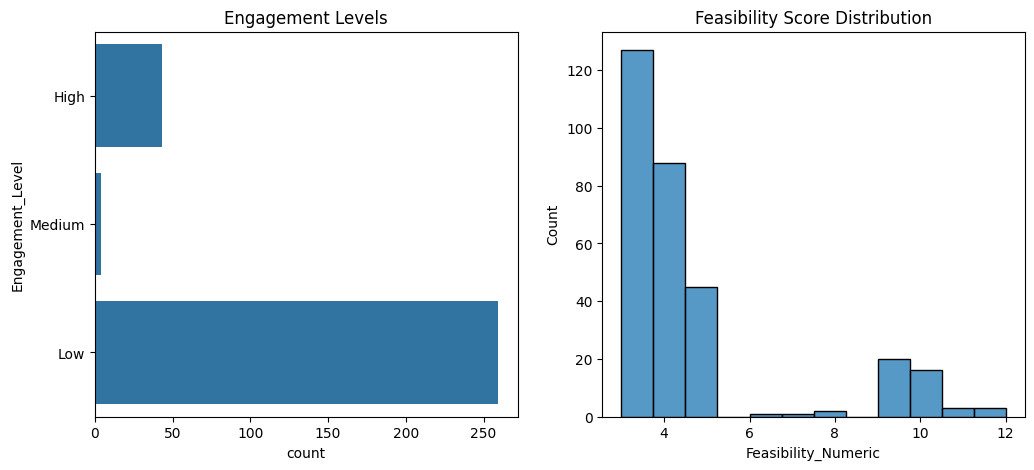

In [10]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from deep_translator import GoogleTranslator
from langdetect import detect
import re
from datetime import datetime
import os
import plotly.express as px # Import plotly.express

st.set_page_config(page_title="Sales Discovery Call Dashboard", layout="wide")

# -------------------------------
# 🔍 Utility Functions
# -------------------------------

def safe_str(text):
    return '' if pd.isna(text) else str(text).strip().lower()

def translate_if_needed(text):
    try:
        text = safe_str(text)
        if not text or len(text) < 5:
            return text
        lang = detect(text)
        if lang != 'en':
            return GoogleTranslator(source='auto', target='en').translate(text)
        return text
    except Exception as e:
        return text

# -------------------------------
# 🗂️ Keyword Sets for Inference
# -------------------------------

positive_keywords = {
    'demo': ['demo', 'calendar', 'schedule', 'walkthrough'],
    'interest': ['interest', 'curious', 'explore'],
    'followup': ['follow-up', 'send', 'next steps', "i'll share", "connect with", "i'll send", "share"],
    'timeline_immediate': ['immediate', 'next week', 'demo scheduled', 'soon', 'asap', 'now'],
    'timeline_medium': ['weeks', 'months', 'quarter'],
    'timeline_long': ['year', 'next year', 'later this year'],
    'pain_high': ['urgent', 'critical', 'must have', 'big problem', 'priority'],
    'pain_medium': ['skills gap', 'leadership', 'training', 'upskilling', 'retention', 'engagement', 'remote learning'],
    'resonated': [
        'affordable', 'cheap', 'budget friendly', 'lms', 'integration', 'curated', 'custom', 'democratize',
        'summary', 'summaries', 'actionables', 'meeting in a box', 'book club', 'sketch notes', 'webinars',
        'author', 'skill matching', 'skill taxonomy', 'skill taxonomies'
    ],
    'not_resonated': ['budget', 'cost', 'too expensive', 'busy', 'no time', 'unclear', 'confusion', 'overwhelmed'],
    'wow_moments': ['excited', 'helpful', 'fantastic', 'exciting', 'incredible', 'neat'],
    'competitors': ['blinkist', 'headway'],
    'pricing': ['pricing', 'paying', 'bucks', 'fee', 'price', 'cost'],
    'lms_names': ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning',
                  'sumtotal', 'crossknowledge', 'cornerstone', 'edcast', 'saba', 'filtered', 'fuse',
                  'sap', 'salesforce', 'moodle', 'absorb', 'learnupon', 'workday learning',
                  'skillsoft', 'mindtickle', 'udemy business', 'bridge', '360learning', 'talentlms']
}
vague_terms = ['unclear', 'n/a', 'not sure', 'maybe', '', 'tbd', "don't know", 'unknown']

positive_timing_phrases = [
    "too busy to train", "no time for long courses", "need bite-sized",
    "need something quick", "short format", "in the flow",
    "learning must be fast", "overwhelmed with content",
    "perfect timing", "fits now", "now is ideal", "timely", "this quarter"
]
negative_timing_phrases = [
    "too busy right now", "reach out later", "next year",
    "not a good time", "check back", "q4 maybe",
    "revisit this", "on hold", "not now", "timing isn’t right",
    "not ready", "postpone", "follow up later"
]

# -------------------------------
# 🧠 Inference Functions
# -------------------------------

def infer_engagement(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['demo']):
        return 'High'
    elif any(k in text for k in positive_keywords['interest'] + positive_keywords['followup']):
        return 'Medium'
    return 'Low'

def infer_timeline(notes):
    text = safe_str(notes)
    if any(k in text for k in positive_keywords['timeline_immediate']):
        return 'Immediate'
    elif any(k in text for k in positive_keywords['timeline_medium']):
        return 'Medium-term'
    elif any(k in text for k in positive_keywords['timeline_long']):
        return 'Long-term'
    return 'Unclear'

def infer_decision_power(title):
    title = safe_str(title)
    if any(role in title for role in ['ceo', 'vp', 'executive', 'director', 'head']):
        return 'High'
    elif any(role in title for role in ['manager', 'lead', 'coordinator']):
        return 'Moderate'
    return 'Low'

def infer_pain(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['pain_high']):
        return 'High'
    elif any(term in text for term in positive_keywords['pain_medium']):
        return 'Moderate'
    return 'Low'

def infer_pain_theme(notes):
    text = safe_str(notes)
    themes = []
    if any(kw in text for kw in ['no time', 'too busy', 'time to learn', 'bite-sized', 'busy']):
        themes.append('Time Constraints')
    if any(kw in text for kw in ['leadership', 'leaders', 'executive']):
        themes.append('Leadership & Talent')
    if any(kw in text for kw in ['onboarding', 'performance review', 'feedback']):
        themes.append('Onboarding & Performance')
    if any(kw in text for kw in ['engagement', 'not used', 'lack of usage', 'learners not committing']):
        themes.append('Engagement & Usage')
    if any(kw in text for kw in ['videos', 'not fit', 'content does not match', 'content not relevant']):
        themes.append('Learning Experience')
    if any(kw in text for kw in ['communication', 'collaboration', 'generational', 'silos']):
        themes.append('Collaboration & Communication')
    return ', '.join(themes) if themes else 'Unclear'

def infer_resonated(notes):
    text = safe_str(notes)
    resonated = set()
    if any(term in text for term in ['afford', 'cheap', 'budget friendly', 'value']):
        resonated.add('Affordability')
    if any(term in text for term in ['integration', 'lms', 'degreed', 'successfactors', 'docebo', 'linkedin learning']):
        resonated.add('LMS Integration')
    if any(term in text for term in ['curated', 'custom', 'tailored', 'ready-made']):
        resonated.add('Curated/Custom Solutions')
    if any(term in text for term in ['democratize', 'accessible', 'open to all']):
        resonated.add('Democratized Learning')
    if any(term in text for term in ['summary', 'summaries', 'abstracts', 'books', 'titles', 'library']):
        resonated.add('Content Library')
    if any(term in text for term in ['ask getabstract', 'ai tool', 'actionables', 'meeting in a box', 'collaborative learning', 'group discussions', 'book club', 'webinar', 'author event']):
        resonated.add('Engagement Tools')
    if any(term in text for term in ['microlearning', 'science-backed', 'habit', 'behavioral']):
        resonated.add('Behavioral Science Hooks')
    if any(term in text for term in ['easy', 'simple', 'quick', 'bite-sized', 'plug and play']):
        resonated.add('Convenience & Efficiency')
    if any(term in text for term in ['trusted', 'credible', 'vetted', 'reputation', 'expert']):
        resonated.add('Credibility & Trust')
    if any(term in text for term in ['reporting', 'dashboard', 'roi', 'impact', 'measurement']):
        resonated.add('Outcomes & Analytics')
    if any(term in text for term in ['leadership', 'culture', 'transformation', 'strategic', 'skills gap']):
        resonated.add('Business Alignment')
    return ', '.join(resonated) if resonated else 'Unclear'

def infer_not_resonated(notes):
    text = safe_str(notes)
    if any(term in text for term in ['budget', 'cost', 'price', 'too expensive']):
        return 'Budget Constraints'
    elif any(term in text for term in ['confusion', 'unclear', 'not sure', 'overwhelming']):
        return 'Confusion'
    elif any(term in text for term in ['need approval', 'not my decision', 'legal', 'procurement', 'compliance']):
        return 'Approval / Decision Barrier'
    elif any(term in text for term in ['generic', 'too broad', 'not relevant', 'one-size']):
        return 'Not Tailored Enough'
    elif any(term in text for term in ['evaluating', 'just looking', 'not ready', 'exploring']):
        return 'Too Early / No Urgency'
    elif any(term in text for term in ['other priorities', 'change fatigue', 'too much going on']):
        return 'Competing Priorities'
    elif any(term in text for term in ['already have', 'duplicate', 'too many tools']):
        return 'Tool Fatigue or Overlap'
    return 'Unclear'

def infer_timing_sentiment(notes):
    text = safe_str(notes)
    if any(phrase in text for phrase in positive_timing_phrases):
        return 'Time-Value Alignment'
    elif any(phrase in text for phrase in negative_timing_phrases):
        return 'Timing Delay'
    return 'Unclear'

def infer_fit(resonated, pain):
    if 'Unclear' in resonated or pain == 'Low':
        return 'Low'
    elif pain == 'Moderate':
        return 'Moderate'
    elif pain == 'High':
        return 'High'
    return 'Moderate'

def infer_follow_up(notes):
    text = safe_str(notes)
    if any(term in text for term in positive_keywords['followup'] + positive_keywords['demo']):
        return 'Yes'
    return 'Possibly'

def calculate_feasibility(engagement, timeline, decision_power, fit):
    scores = {
        'Engagement': {'High': 3, 'Medium': 2, 'Low': 1},
        'Timeline': {'Immediate': 3, 'Medium-term': 2, 'Long-term': 1, 'Unclear': 0},
        'Decision Power': {'High': 3, 'Moderate': 2, 'Low': 1},
        'Fit': {'High': 3, 'Moderate': 2, 'Low': 1}
    }
    e = scores['Engagement'].get(engagement, 0)
    t = scores['Timeline'].get(timeline, 0)
    d = scores['Decision Power'].get(decision_power, 0)
    f = scores['Fit'].get(fit, 0)
    return f"{e + t + d + f}/12", e, t, d, f

def refined_title_group(title):
    translated = translate_to_english(title).lower()
    if any(k in translated for k in ['ceo', 'chief', 'vp', 'vice president', 'executive director', 'president']):
        return 'Executive Leadership'
    elif any(k in translated for k in ['learning', 'l&d', 'training', 'development']):
        return 'Learning & Development'
    elif any(k in translated for k in ['hr', 'human resources', 'people', 'talent']):
        return 'HR / People Ops'
    elif any(k in translated for k in ['recruit', 'talent', 'acquisition']):
        return 'Talent Acquisition / Recruiting'
    elif any(k in translated for k in ['org dev', 'organizational development', 'od']):
        return 'Organizational Development'
    elif any(k in translated for k in ['coach', 'facilitator', 'mentor']):
        return 'Coaching & Facilitation'
    elif any(k in translated for k in ['specialist', 'analyst', 'admin', 'assistant']):
        return 'Specialists / Admin'
    elif any(k in translated for k in ['educator', 'teacher', 'professor']):
        return 'Education / Academic'
    return 'Other / Unclassified'

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except:
        return str(text)

# -------------------------------
# 📁 Load Data
# -------------------------------

@st.cache_data
def load_data():
    file_path = 'chorus_opps_with_transcripts.xlsx'
    df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

    comparison_df = df[['company_/_account', 'title', 'assigned', 'comments', 'transcript', 'primary_campaign_source', 'chorus_link']].copy()
    # Rename columns with underscores
    comparison_df.columns = ['Company', 'Contact_Title', 'Account_Owner', 'Call_Notes', 'Transcript_Raw', 'Campaign_Source', 'Chorus_Link']
    comparison_df.columns = comparison_df.columns.str.replace(' ', '_') # Add this renaming step

    comparison_df['Transcript'] = comparison_df['Transcript_Raw'].apply(translate_if_needed)
    comparison_df['Translated_Title'] = comparison_df['Contact_Title'].apply(translate_to_english)

    def extract_event_name(notes):
        notes = safe_str(notes)
        match = re.match(r'(.*?2025)', notes)
        return match.group(1).strip() if match else 'Unknown / No Event'

    comparison_df['Event_Name'] = comparison_df['Call_Notes'].apply(extract_event_name)

    comparison_df['Engagement_Level'] = comparison_df['Transcript'].apply(infer_engagement)
    comparison_df['Interest_Timeline'] = comparison_df['Transcript'].apply(infer_timeline)
    comparison_df['Decision_Power'] = comparison_df['Translated_Title'].apply(infer_decision_power)
    comparison_df['Pain_Points_Severity'] = comparison_df['Transcript'].apply(infer_pain)
    comparison_df['What_Resonated'] = comparison_df['Transcript'].apply(infer_resonated)
    comparison_df['What_Didn’t_Resonate'] = comparison_df['Transcript'].apply(infer_not_resonated)
    comparison_df['getAbstract_Fit'] = comparison_df.apply(lambda x: infer_fit(x['What_Resonated'], x['Pain_Points_Severity']), axis=1)
    comparison_df['Follow_up_Needed'] = comparison_df['Transcript'].apply(infer_follow_up)
    comparison_df['Timing_Sentiment'] = comparison_df['Transcript'].apply(infer_timing_sentiment)
    comparison_df['Pain_Theme_(from_Transcript)'] = comparison_df['Transcript'].apply(infer_pain_theme)

    comparison_df['Missing_Transcript'] = comparison_df['Transcript'].apply(
        lambda x: True if safe_str(x) in ['', 'nan', 'none'] or len(safe_str(x)) < 10 else False
    )
    comparison_df['Unclear_Resonance'] = comparison_df.apply(
        lambda x: (
            True
            if (not x['Missing_Transcript'] and any(term in safe_str(x['What_Resonated']) for term in vague_terms))
            else False
        ),
        axis=1
    )

    fs_results = comparison_df.apply(
        lambda x: calculate_feasibility(x['Engagement_Level'], x['Interest_Timeline'], x['Decision_Power'], x['getAbstract_Fit']),
        axis=1
    )
    fs_cols = ['Feasibility_Score', 'Engagement_Score', 'Timeline_Score', 'Decision_Score', 'Fit_Score']
    comparison_df[fs_cols] = pd.DataFrame(fs_results.tolist(), index=comparison_df.index)
    comparison_df['Feasibility_Numeric'] = comparison_df['Feasibility_Score'].apply(lambda x: int(x.split('/')[0]))

    comparison_df['Refined_Role_Group'] = comparison_df['Translated_Title'].apply(refined_title_group)

    # Ensure date column exists for plotting or handle its absence
    if 'date' in df.columns:
         comparison_df['Date'] = pd.to_datetime(df['date'], errors='coerce') # Assuming original df has a 'date' column
    else:
         comparison_df['Date'] = pd.NaT # Add a placeholder if no date column exists


    return comparison_df

df = load_data()

if df.empty:
    st.error("No data found. Please make sure the input file exists.")
else:
    # -------------------------------
    # 🤖 BERTopic: Discover Hidden Themes
    # -------------------------------

    @st.cache_resource
    def get_topic_model():
        valid_transcripts = df[df['Transcript'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 50)]['Transcript']
        if len(valid_transcripts) < 2:
            return None, None, None, valid_transcripts

        vectorizer_model = CountVectorizer(stop_words="english", min_df=1)
        topic_model = BERTopic(vectorizer_model=vectorizer_model, verbose=False)
        topics, probs = topic_model.fit_transform(valid_transcripts.tolist())
        return topic_model, topics, probs, valid_transcripts

    topic_model, topics, probs, valid_transcripts = get_topic_model()

    # Map topics back to DataFrame
    if topic_model is not None:
        topic_col = []
        for _, row in df.iterrows():
            transcript = row['Transcript']
            if isinstance(transcript, str) and len(transcript.strip()) > 50:
                # Handle potential errors during transform if a single short transcript remains
                try:
                    topic, _ = topic_model.transform([transcript])
                    topic_col.append(topic[0])
                except ValueError: # Catch error if transform fails for single document
                     topic_col.append(-1)
            else:
                topic_col.append(-1)

        df['AI_Topic'] = topic_col
        # Ensure we only map topics that exist after fitting
        valid_topic_ids = [i for i in set(topic_col) if i != -1]
        topic_map = {i: ", ".join([word[0] for word in topic_model.get_topic(i)[:3]]) for i in valid_topic_ids}
        topic_map[-1] = 'Unknown Topic' # Add label for -1 topic
        df['AI_Topic_Label'] = df['AI_Topic'].map(topic_map).fillna('Unknown Topic') # Fill NaNs that might occur if a topic existed before filtering but not after


    else:
        df['AI_Topic'] = -1
        df['AI_Topic_Label'] = 'Not enough data for AI topic modeling'

    # -------------------------------
    # 🎯 Main Dashboard UI
    # -------------------------------

    st.title("🧠 Sales Discovery Call Dashboard")
    st.markdown("Explore discovery call insights and conversation themes detected via **BERTopic**.")

    # Sidebar filters
    st.sidebar.header("🔍 Filters")
    owners = st.sidebar.multiselect("Select Account Owner(s)", options=df["Account_Owner"].unique())
    role_groups = st.sidebar.multiselect("Select Role Group(s)", options=df["Refined_Role_Group"].unique())
    feasibility_bands = st.sidebar.multiselect("Select Feasibility Band", options=["High", "Medium", "Low"])
    event_names = st.sidebar.multiselect("Select Event Name", options=df["Event_Name"].unique())

    search_term = st.sidebar.text_input("Search in Transcript or Company")
    if search_term:
        df = df[df["Transcript"].str.contains(search_term, case=False, na=False) |
                df["Company"].str.contains(search_term, case=False, na=False)]

    # Apply filters
    if owners:
        df = df[df["Account_Owner"].isin(owners)]
    if role_groups:
        df = df[df["Refined_Role_Group"].isin(role_groups)]
    if feasibility_bands:
        # Map feasibility band to numeric range
        band_map = {"High": (8, 12), "Medium": (4, 7), "Low": (0, 3)}
        # Filter based on numeric feasibility score
        min_score = min([band_map[band][0] for band in feasibility_bands])
        max_score = max([band_map[band][1] for band in feasibility_bands])
        df = df[(df["Feasibility_Numeric"] >= min_score) & (df["Feasibility_Numeric"] <= max_score)]
    if event_names:
        df = df[df["Event_Name"].isin(event_names)]

    # -------------------------------
    # 📊 Summary Statistics
    # -------------------------------

    col1, col2, col3 = st.columns(3)
    col1.metric("Total Meetings", len(df))
    # Ensure df is not empty before accessing mode
    if not df["What_Resonated"].isnull().all():
         top_resonated = df["What_Resonated"].mode()[0]
    else:
         top_resonated = "N/A"

    col2.metric("High Feasibility Opportunities", len(df[df["Feasibility_Numeric"] >= 8]))
    col3.metric("Top Resonated Theme", top_resonated)


    # -------------------------------
    # 📈 Key Charts
    # -------------------------------

    st.subheader("📈 Engagement & Feasibility Overview")
    if not df.empty: # Ensure df is not empty before plotting
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        sns.countplot(data=df, y="Engagement_Level", order=["High", "Medium", "Low"], ax=ax[0])
        ax[0].set_title("Engagement Levels")
        sns.histplot(data=df, x="Feasibility_Numeric", bins=12, ax=ax[1])
        ax[1].set_title("Feasibility Score Distribution")
        st.pyplot(fig)
    else:
        st.write("No data available for charts after filtering.")

    # -------------------------------
    # 🧭 Resonance by Role Group
    # -------------------------------

    st.subheader("🧱 Resonance by Role Group")
    # Ensure df is not empty and 'Refined_Role_Group' and 'What_Resonated' exist before processing
    if not df.empty and 'Refined_Role_Group' in df.columns and 'What_Resonated' in df.columns:
        exploded = df.set_index("Refined_Role_Group")["What_Resonated"].str.split(", ").explode().reset_index()
        # Drop rows where What_Resonated is empty or 'Unclear' after exploding
        exploded = exploded[~exploded['What_Resonated'].isin(['', 'Unclear', None])].dropna()
        if not exploded.empty:
            role_resonance = exploded.groupby(["Refined_Role_Group", "What_Resonated"]).size().unstack(fill_value=0).T
            st.bar_chart(role_resonance)
        else:
            st.write("No resonance data available after filtering.")
    else:
        st.write("No data available for Resonance chart after filtering.")


    # -------------------------------
    # 🩺 Pain Points Breakdown
    # -------------------------------

    st.subheader("🩺 Top Pain Themes")
    # Ensure df is not empty and 'Pain_Theme_(from_Transcript)' exists
    if not df.empty and 'Pain_Theme_(from_Transcript)' in df.columns:
        pain_counts = df["Pain_Theme_(from_Transcript)"].str.split(", ").explode()
        # Drop rows with empty or 'Unclear' themes
        pain_counts = pain_counts[~pain_counts.isin(['', 'Unclear', None])].value_counts().head(10)
        if not pain_counts.empty:
            st.bar_chart(pain_counts)
        else:
             st.write("No pain theme data available after filtering.")
    else:
        st.write("No data available for Pain Points chart after filtering.")


    # -------------------------------
    # 📋 Filtered Meeting List
    # -------------------------------

    st.subheader("📋 Filtered Meeting List")
    # Select columns to display and ensure they exist
    display_cols = ['Company', 'Contact_Title', 'Account_Owner', 'Event_Name', 'Feasibility_Score', 'Engagement_Level', 'What_Resonated', 'Pain_Theme_(from_Transcript)']
    # Filter for columns that actually exist in the DataFrame
    existing_display_cols = [col for col in display_cols if col in df.columns]
    st.dataframe(df[existing_display_cols])

    # -------------------------------
    # 🧠 Optional: Topic Modeling View
    # -------------------------------

    if topic_model is not None and 'AI_Topic_Label' in df.columns and not df['AI_Topic_Label'].isin(['Not enough data for AI topic modeling', 'Unknown Topic']).all():
        st.subheader("🧠 AI-Powered Topics from Conversations")
        # Filter out the placeholder label for topic counts
        topic_counts = df[~df['AI_Topic_Label'].isin(['Not enough data for AI topic modeling', 'Unknown Topic'])]['AI_Topic_Label'].value_counts()
        if not topic_counts.empty:
             st.bar_chart(topic_counts.head(10))
        else:
             st.write("No specific AI topics found after filtering.")

        st.subheader("🌐 Interactive Topic Clusters")
        # Ensure enough valid transcripts remain after filtering for visualization
        valid_transcripts_filtered = df[df['AI_Topic'] != -1]['Transcript']
        topics_filtered = df[df['AI_Topic'] != -1]['AI_Topic']
        if len(valid_transcripts_filtered) >= 2 and topic_model is not None:
             try:
                 # Re-run visualization with potentially filtered data
                 fig_topics = topic_model.visualize_topics(topics=topics_filtered)
                 st.plotly_chart(fig_topics)
             except Exception as e:
                 st.write(f"Could not generate topic clusters visualization. Error: {e}")
        else:
             st.write("Not enough data to visualize topic clusters after filtering.")


        st.subheader("🧱 Topic Frequency")
        if topic_model is not None and 'AI_Topic_Label' in df.columns and not df['AI_Topic_Label'].isin(['Not enough data for AI topic modeling', 'Unknown Topic']).all():
             # Filter out the placeholder label before plotting frequency
             valid_topics_for_freq = df[~df['AI_Topic_Label'].isin(['Not enough data for AI topic modeling', 'Unknown Topic'])]['AI_Topic'].tolist()
             if valid_topics_for_freq: # Check if list is not empty
                 fig_barchart = topic_model.visualize_barchart(topics=valid_topics_for_freq, top_n_topics=10)
                 st.plotly_chart(fig_barchart)
             else:
                 st.write("No specific AI topics with frequency data available after filtering.")
        else:
             st.write("Not enough data to visualize topic frequency after filtering.")


        st.subheader("📄 Interactive Document Viewer")
        if topic_model is not None and 'AI_Topic' in df.columns and not df.empty:
            # Filter documents for those with assigned topics (not -1)
            docs_for_viewer = df[df['AI_Topic'] != -1]['Transcript'].tolist()
            topics_for_viewer = df[df['AI_Topic'] != -1]['AI_Topic'].tolist()
            # Check if there are enough documents and topics for the viewer
            if docs_for_viewer and topics_for_viewer and len(docs_for_viewer) == len(topics_for_viewer):
                 try:
                     fig_documents = topic_model.visualize_documents(docs_for_viewer, topics=topics_for_viewer, custom_labels=True)
                     st.plotly_chart(fig_documents)
                 except Exception as e:
                     st.write(f"Could not generate interactive document viewer. Error: {e}")
            else:
                 st.write("Not enough data to visualize documents after filtering.")
        else:
             st.write("Not enough data to visualize documents after filtering.")

    # -------------------------------
    # 💾 Export Button
    # -------------------------------

    if st.sidebar.button("Export Filtered Data"):
        today = datetime.now().strftime("%Y-%m-%d")
        # Ensure index is reset for clean export
        df.to_excel(f"filtered_opportunities_{today}.xlsx", index=False)
        st.sidebar.success("✅ Exported to Excel!")

    # -------------------------------
    # 📌 Tabs for Advanced Views
    # -------------------------------
    # -------------------------------
    # 📌 Tabs for Advanced Views
    # -------------------------------

    tabs = st.tabs(["📞 Calls per Agent", "📅 Feasibility over Time", "📊 Feasibility per Event", "🧠 AI Topics"])

    with tabs[0]:
        owner_counts = df["Account_Owner"].value_counts().reset_index()
        owner_counts.columns = ["Agent", "Number_of_Meetings"]
        fig = px.bar(owner_counts, x="Agent", y="Number_of_Meetings", title="Calls per Agent")
        st.plotly_chart(fig)

    with tabs[1]:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df_sorted = df.sort_values("Date").reset_index(drop=True)
            fig = px.line(df_sorted, x="Date", y="Feasibility_Numeric", markers=True, title="Feasibility Trend Over Time")
            st.plotly_chart(fig)

    with tabs[2]:
        feasibility_by_event = df.groupby("Event_Name")["Feasibility_Numeric"].mean().sort_values(ascending=False).reset_index()
        fig = px.bar(feasibility_by_event, x="Event_Name", y="Feasibility_Numeric", title="Avg Feasibility by Event")
        st.plotly_chart(fig)

    with tabs[3]:
        st.write("### Top Topics Discovered")
        st.dataframe(df["AI_Topic_Label"].value_counts().head(10))

    # -------------------------------
    # 📄 Transcript Explorer Tab
    # -------------------------------

    st.subheader("📄 Transcript Explorer")
    st.dataframe(df[['Company', 'Contact_Title', 'Account_Owner', 'Event_Name', 'Transcript']])

In [11]:
from pyngrok import ngrok
import threading
import time

# Set Ngrok token
ngrok.set_auth_token("2xfsJL8otKGi7qL0rfTg1DUJHXK_3TLuiZTZbJmvB45qoFqxx")

# Start Streamlit
def start_streamlit():
    !streamlit run dashboard.py --server.port 8501

threading.Thread(target=start_streamlit).start()
time.sleep(5)

# Get public link
public_url = ngrok.connect(8501)
st.markdown(f"🌐 Public URL: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.169.226:8501



2025-05-27 13:48:23.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 13:48:23.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()